In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
df = pd.read_csv('master_table.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 14 columns):
title_id                      17172 non-null object
Country                       17147 non-null object
Budget                        17172 non-null int64
Opening Weekend USA           17172 non-null int64
Gross USA                     17172 non-null int64
Cumulative Worldwide Gross    17172 non-null int64
primary_title                 17172 non-null object
start_year                    17172 non-null int64
runtime_minutes               15986 non-null float64
genres                        17172 non-null object
averagerating                 16507 non-null float64
numvotes                      16507 non-null float64
director                      9898 non-null object
Profit                        17172 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 1.8+ MB


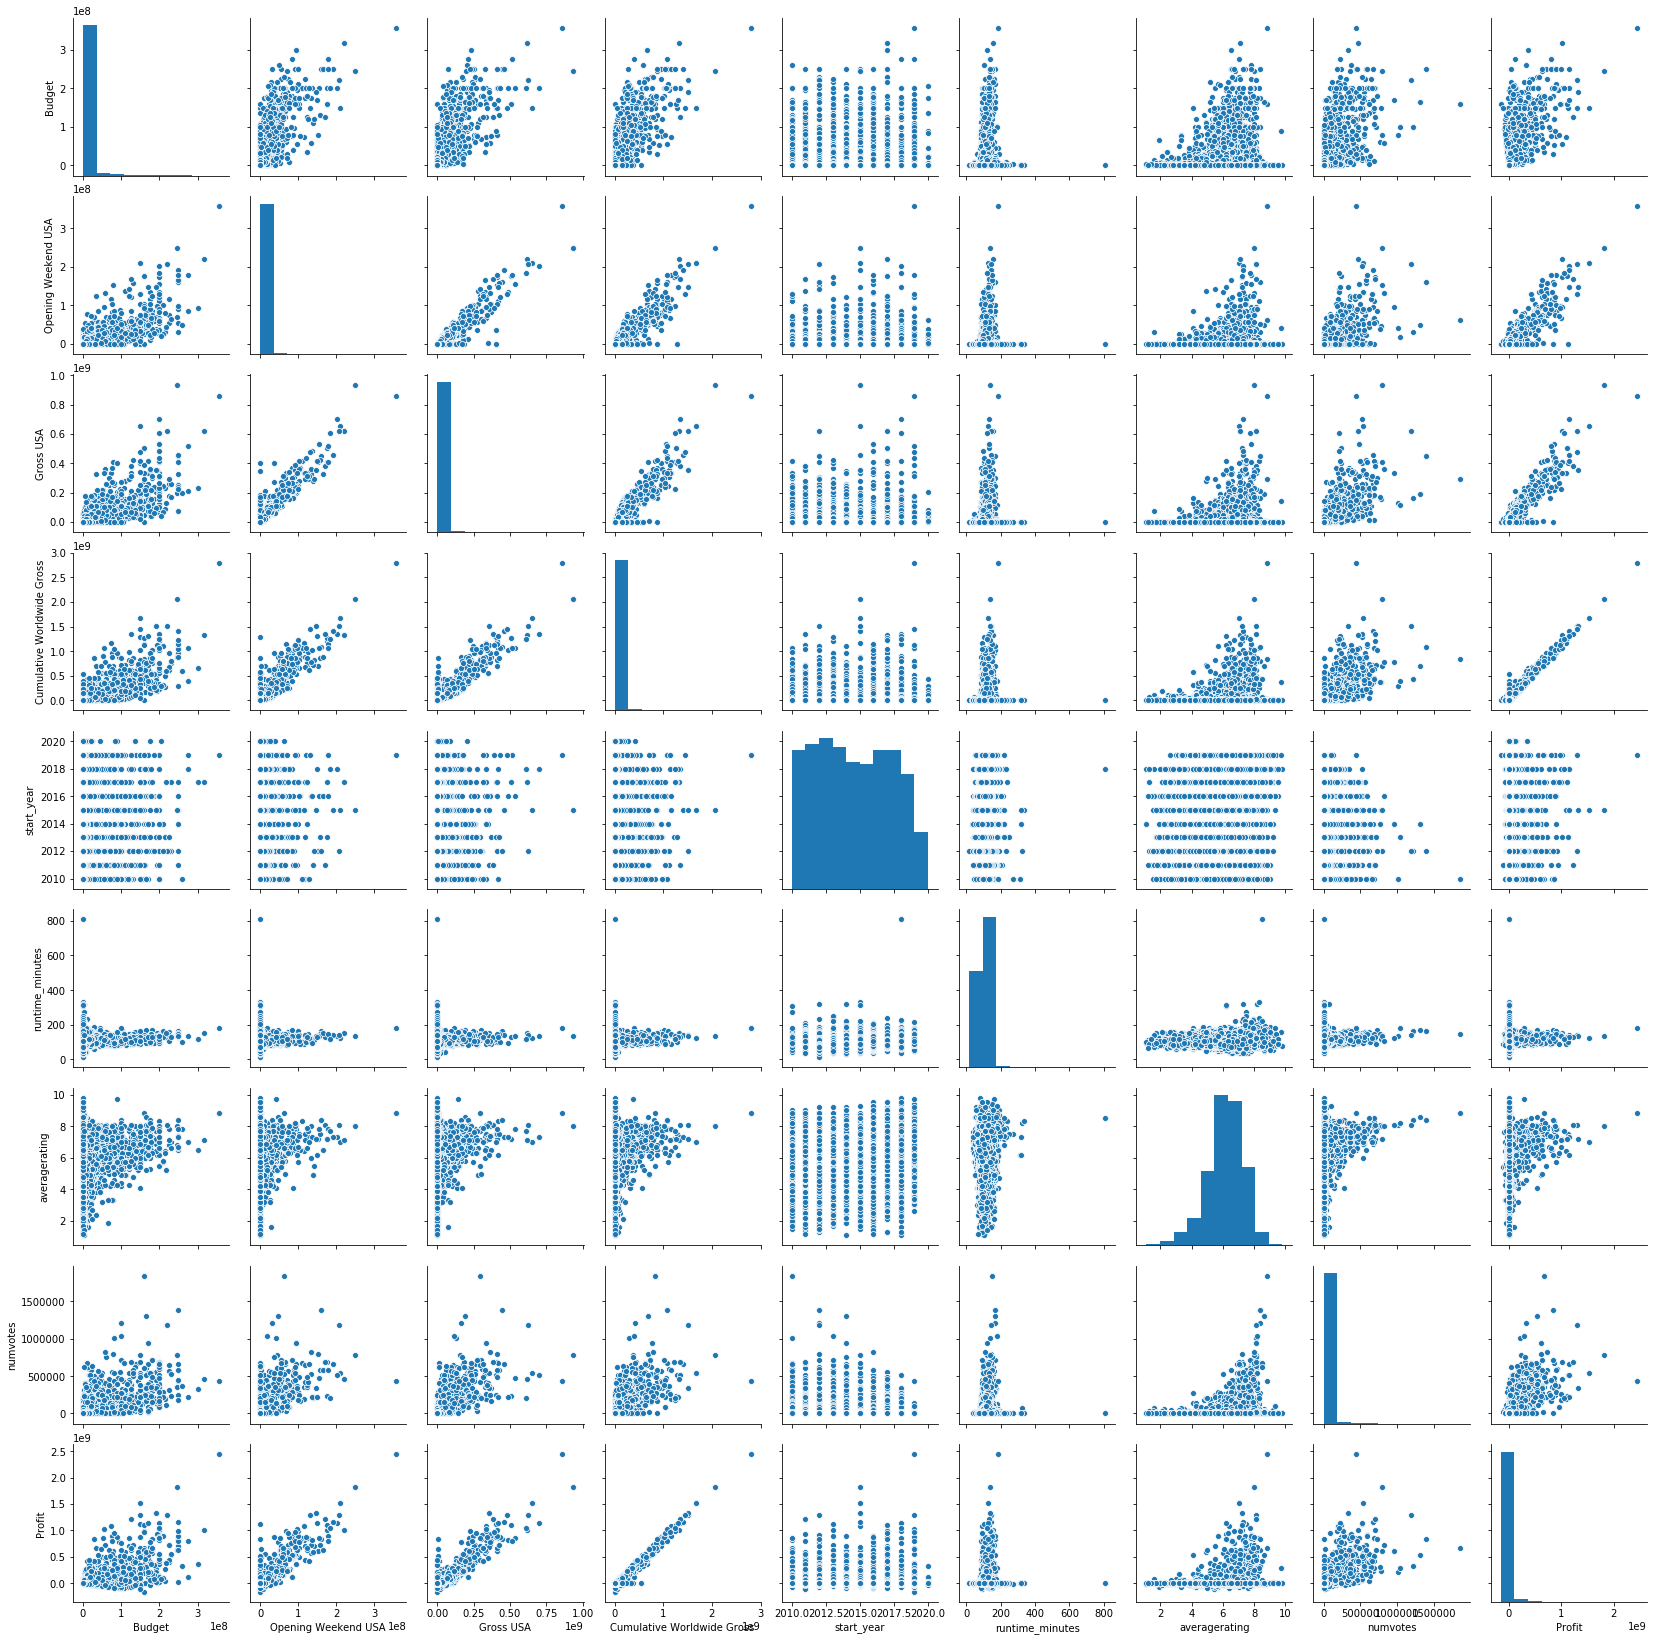

In [4]:
sns.pairplot(df)

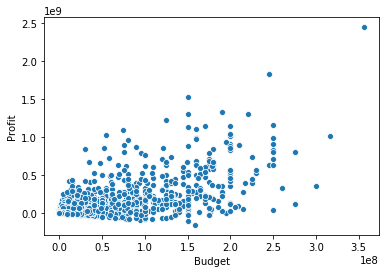

In [5]:
sns.scatterplot(x=df['Budget'], y=df['Profit'])

In [25]:
df.describe()

,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,averagerating,numvotes,Profit
count,1.717200e+04,1.717200e+04,1.717200e+04,1.717200e+04,17172.000000,15986.000000,16507.000000,1.650700e+04,1.717200e+04
mean,5.493568e+06,1.762917e+06,5.837795e+06,1.794257e+07,2014.103541,102.095271,6.143672,1.410334e+04,1.007867e+07
std,2.173181e+07,1.053529e+07,3.272471e+07,8.934955e+07,2.723402,20.342989,1.155549,6.188770e+04,7.218999e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2010.000000,15.000000,1.100000,5.000000e+00,-1.580311e+08
25%,0.000000e+00,0.000000e+00,0.000000e+00,3.601025e+04,2012.000000,90.000000,5.500000,1.220000e+02,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,3.653050e+05,2014.000000,98.000000,6.300000,5.220000e+02,0.000000e+00
75%,8.000000e+05,3.412250e+03,1.710475e+04,3.323890e+06,2016.000000,110.000000,6.900000,2.940000e+03,0.000000e+00
max,3.560000e+08,3.571150e+08,9.366622e+08,2.797801e+09,2020.000000,808.000000,9.800000,1.841066e+06,2.441801e+09


In [49]:
director_group = df.groupby(['director'])

In [52]:
director_group.sort_values('Profit', ascending=False)

AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method

# Genres with the Highest Profit

In [17]:
df['genres'] = df['genres'].map(lambda x: ast.literal_eval(x))

In [60]:
alt_genre_list = []

In [61]:
for x in df.genres:
    alt_genre_list.extend(x.split(','))

AttributeError: 'list' object has no attribute 'split'

In [18]:
list_of_genres = [row[0] for row in df['genres']]

In [19]:
l_o_genres = list(set(list_of_genres))

In [20]:
l_o_genres.remove('NaN')

In [59]:
l_o_genres

['Sport',
 'Horror',
 'Adventure',
 'Musical',
 'Biography',
 'History',
 'Comedy',
 'Fantasy',
 'Romance',
 'Documentary',
 'Action',
 'Crime',
 'War',
 'Western',
 'Mystery',
 'Animation',
 'Thriller',
 'Music',
 'Drama',
 'Family',
 'Sci-Fi']

In [66]:
zero_matrix = np.zeros((len(df), len(l_o_genres)))

In [67]:
dummies = pd.DataFrame(zero_matrix, columns=l_o_genres)

In [74]:
df.genres[0]

['Action', 'Adventure', 'Sci-Fi']

In [71]:
gen = df.genres[0]

In [72]:
dummies.columns.get_indexer(gen)

array([10,  2, 20])

In [75]:
for i, gen in enumerate(df.genres):
    indices = dummies.columns.get_indexer(gen)
    dummies.iloc[i, indices] = 1

In [76]:
dummies

,Sport,Horror,Adventure,Musical,Biography,History,Comedy,Fantasy,Romance,Documentary,...,Crime,War,Western,Mystery,Animation,Thriller,Music,Drama,Family,Sci-Fi
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17169,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17170,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


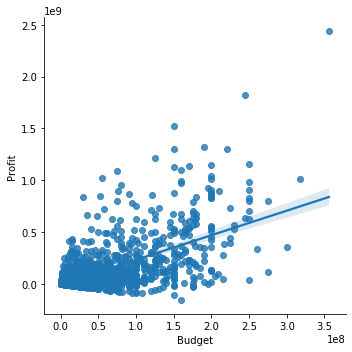

In [24]:
sns.lmplot(x='Budget', y='Profit', data=df, )

In [55]:
df[df['genres'].isna()]

KeyError: 'Requested level (Action) does not match index name (None)'